In [1]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


#### We will find a linear relationship between Head Size and Brain Weights.
#### X contains the "Head size" values and Y contains the "Brain weight" values

In [2]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [3]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numerator = 0
denominator = 0
for i in range(m):
    numerator+= (X[i]-mean_x)*(Y[i]-mean_y)
    denominator+=(X[i]-mean_x)**2
b1 = numerator/denominator
b0 = mean_y-(b1*mean_x)


# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


#### The equation boils down to :
#### Brain Weight = 325.573421049 + 0.263429339489 * Head Size

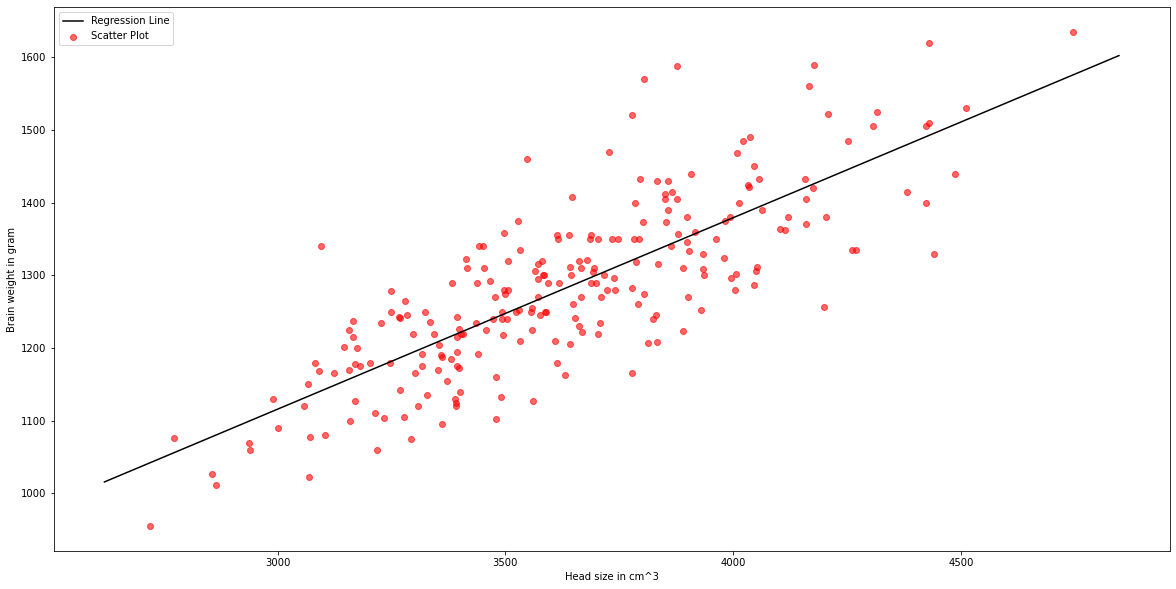

In [4]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x,y,color ='black', label = 'Regression Line')

# Ploting Scatter Points
plt.scatter(X,Y,c="red",label="Scatter Plot", alpha= 0.6)

#Changing default styles directly by modifying the matplotlib.rcParams 
plt.rcParams['figure.figsize'] = (20.0,10.0)


plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in gram')
plt.legend()
plt.show()

### R-squared is a goodness-of-fit measure for linear regression models.

### SS_t is the total sum of squares and SS_r is the total sum of squares of residuals.
### R^2  Score usually range from 0 to 1.

In [5]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0+b1*X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
    
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


#### Root Mean Squared Error is the square root of sum of all errors divided by number of values

In [6]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


### Implementing the above code using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(r2_score)
print(np.sqrt(mse))